# PROJECT - 5 

# BIKE SHARING SYSTEM

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

In [5]:
data=pd.read_csv("Bikes.csv")
data.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [6]:
data.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [7]:
data=data.drop(["date"],axis=1)

In [8]:
data.dtypes

temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [9]:
data.keys()

Index(['temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [10]:
data.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [11]:
data.isnull().sum()

temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

In [12]:
data.head()

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.0
1,2.896673,54.267219,15.136882,108.0
2,4.235654,45.697702,17.034578,82.0
3,3.112643,50.237349,10.091568,88.0
4,2.723918,49.144928,15.738204,148.0


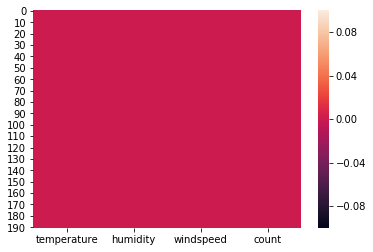

In [13]:
sns.heatmap(data.isnull())

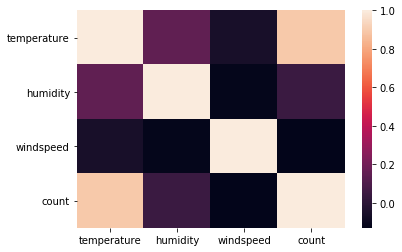

In [14]:
sns.heatmap(data.corr())

In [15]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008E716D8>,
      dtype=object)

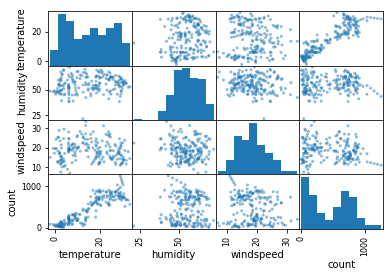

In [16]:
scatter_matrix(data)

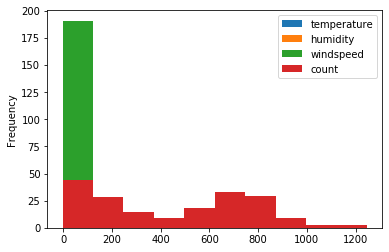

In [17]:
data.plot.hist()

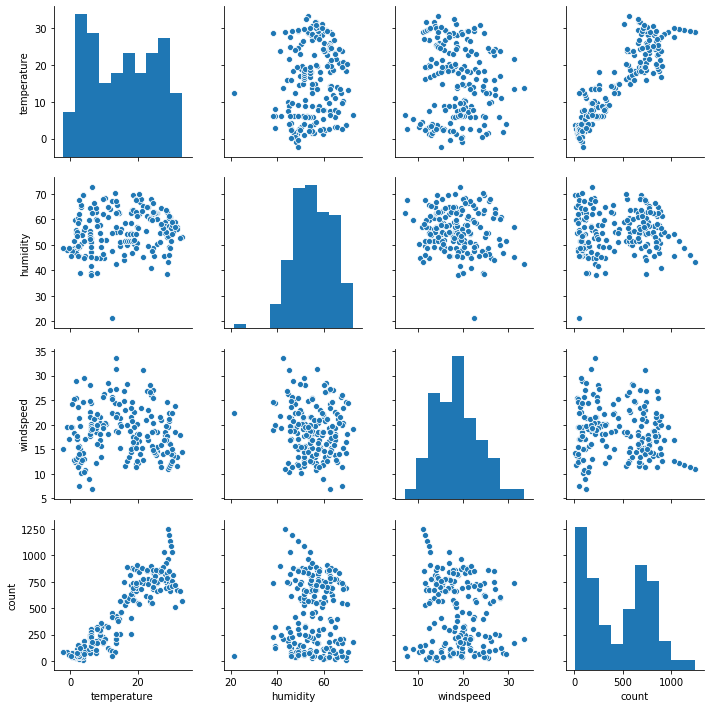

In [18]:
sns.pairplot(data)

# CHECKING OUTLIERS

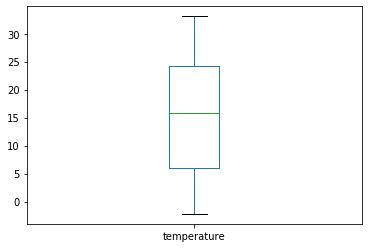

In [19]:
data["temperature"].plot.box()

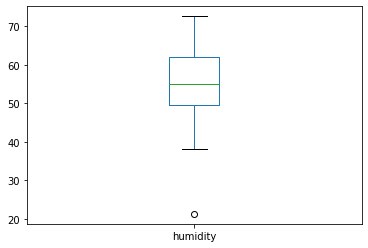

In [20]:
data["humidity"].plot.box()

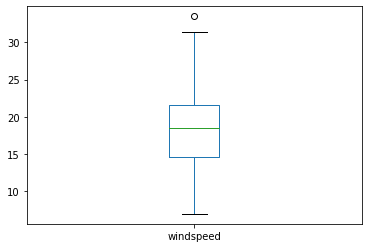

In [21]:
data["windspeed"].plot.box()

# SPLITTING INTO x AND y

In [22]:
x=data.iloc[:,0:-1]

In [23]:
x.head()

,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204


In [24]:
x.shape

(191, 3)

In [25]:
y=data.iloc[:,-1]
y.head()

0    120.0
1    108.0
2     82.0
3     88.0
4    148.0
Name: count, dtype: float64

In [26]:
y.shape

(191,)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 86 is 0.9023571701676447


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Test Options and Evaluation Metrics
num_folds = 5
scoring='r2'
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTC', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=20)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

LR: 0.819318 (0.025033)
KNN: 0.859746 (0.015392)
DTC: 0.789560 (0.074454)
RFR: 0.863662 (0.016372)


In [44]:
from sklearn.model_selection import GridSearchCV
# Build parameter grid
params= {'max_depth':[10,20,30,40,50],
            'min_samples_split':[2,3,4,7],
            'min_samples_leaf' :[1,3,5],
            'max_features':['sqrt','log2'],
              }
# Build the model
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=50)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.865913 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.811312 (0.046905) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.809451 (0.063971) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.840489 (0.012759) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.791847 (0.057853) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7}
0.799281 (0.060987) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.755149 (0.089836) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3}
0.790600 (0.024388) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}
0.799412 (0.045965) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf

In [45]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print(r2_score(y_test,predrfr))
print(mean_squared_error(y_test,predrfr))

0.89625067921543
9539.228202519376


In [46]:
data_new=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data_new

,Actual,Predicted
147,722.500000,928.948854
85,317.000000,327.294732
126,664.000000,607.409633
51,139.000000,243.592810
90,591.666667,471.971259
46,579.000000,568.212226
65,191.000000,182.618249
36,64.000000,72.374780
182,1084.750000,954.296163
40,168.666667,234.652649


In [47]:
#MODEL SAVING
from sklearn.externals import joblib
joblib.dump(rfr,"BIKE_SHARING.pkl")

['BIKE_SHARING.pkl']